In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds


tf.__version__

'2.19.0'

In [5]:
ds_preview , info = tfds.load("penguins/simple", split="train", with_info=True)

In [18]:
df = tfds.as_dataframe(ds_preview, info)

df.head()

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm,island,sex,species
0,4200.0,13.9,45.500000,210.0,0,0,2
1,4650.0,13.7,40.900002,214.0,0,0,2
2,5300.0,14.2,51.299999,218.0,0,1,2
3,5650.0,15.0,47.799999,215.0,0,1,2
4,5050.0,15.8,46.299999,215.0,0,1,2


In [20]:
info.features

FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})

In [21]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']


In [43]:
ds_split, info = tfds.load("penguins/processed", split=["train[:20%]", "train[20%:]"], as_supervised=True, with_info=True)


In [44]:
ds_test = ds_split[0]
ds_train = ds_split[1]

In [45]:
tfds.as_dataframe(ds_test.take(5), info)

2025-06-09 10:11:10.789192: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,features,species
0,"ndarray(shape=(4,), dtype=float32)",2
1,"ndarray(shape=(4,), dtype=float32)",2
2,"ndarray(shape=(4,), dtype=float32)",2
3,"ndarray(shape=(4,), dtype=float32)",2
4,"ndarray(shape=(4,), dtype=float32)",2


In [57]:
df_train = tfds.as_dataframe(ds_train, info)
df_test = tfds.as_dataframe(ds_test, info)


In [58]:
next(iter(ds_train))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.49818182, 0.6904762 , 0.42372882, 0.4027778 ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [59]:
ds_train_batch = ds_train.batch(32)
ds_train_batch

<_BatchDataset element_spec=(TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [61]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

In [63]:
features[:,2]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.42372882, 0.6440678 , 0.6440678 , 0.33898306, 0.3559322 ,
       0.47457626, 0.4915254 , 0.37288135, 0.37288135, 0.2542373 ,
       0.5084746 , 0.2542373 , 0.27118644, 0.22033899, 0.15254237,
       0.88135594, 0.6440678 , 0.84745765, 0.27118644, 0.20338982,
       0.33898306, 0.10169491, 0.7288136 , 0.7118644 , 0.3559322 ,
       0.7457627 , 0.2542373 , 0.7457627 , 0.7288136 , 0.779661  ,
       0.89830506, 0.20338982], dtype=float32)>

Text(0.5, 0, 'Body mass')

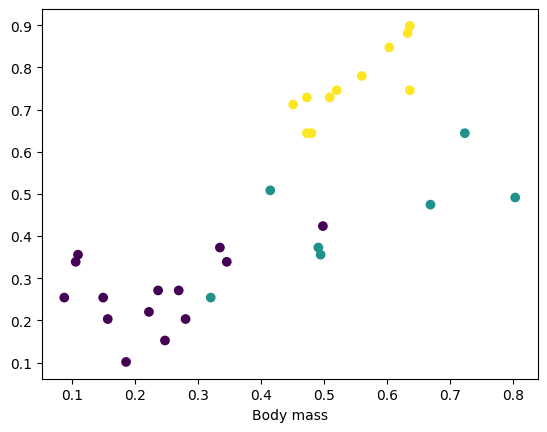

In [68]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,2], c=labels)
plt.xlabel("Body mass")

In [70]:
model  = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3),
])

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
features.shape

TensorShape([32, 4])

In [74]:
model(features)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-0.0361423 , -0.2054071 ,  0.75500715],
       [-0.10624645, -0.15257849,  0.46931985],
       [-0.07010586, -0.28587788,  1.0603334 ],
       [-0.01631317, -0.17040715,  0.63332486],
       [ 0.03124002, -0.21294884,  0.8029624 ],
       [-0.1701435 , -0.11556913,  0.7059585 ],
       [-0.11196011, -0.1983197 ,  0.9118808 ],
       [-0.06351407, -0.1708715 ,  0.72453153],
       [-0.00163885, -0.22377299,  0.8112111 ],
       [-0.05640418, -0.09654883,  0.4361397 ],
       [-0.08836744, -0.18527684,  0.7462555 ],
       [ 0.00873874, -0.15128207,  0.5002154 ],
       [-0.04455334, -0.11560048,  0.4774307 ],
       [ 0.00368198, -0.1259965 ,  0.56001544],
       [-0.00809385, -0.09401093,  0.46661407],
       [-0.05466983, -0.3160425 ,  0.899602  ],
       [-0.09551991, -0.18063205,  0.5630723 ],
       [-0.07470033, -0.27343252,  0.7826501 ],
       [-0.01234158, -0.15102132,  0.54729646],
       [-0.01849334, -0.09504318,  0.62

In [75]:
# calculate the loss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [76]:
def loss(model, x, y , training = False):
    pred = model(x, training=training)
    
    return loss_object(y, pred)


l  =  loss(model, features, labels)
print(l)
    

tf.Tensor(1.1165134, shape=(), dtype=float32)


In [78]:
def grad(model, x, y):
    with tf.GradientTape as tape:
        loss_value = loss(model, x, y, training=True)
        
        return loss_value ,  tape.gradient(loss_value, model.trainable_variables)
        
        

In [83]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

optimizer.learning_rate

<Variable path=SGD/learning_rate, shape=(), dtype=float32, value=0.009999999776482582>

In [89]:
train_loss_result = []
train_acc_result = []

epochs = 200

for epoch in range(epochs):
    epoch_loss_avfg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for x , y in ds_train_batch:
       
        
        # calc gradient
        with tf.GradientTape() as tape:
            pred = model(x,training=True)
            loss_value = loss_object(y, pred)
            grad = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grad, model.trainable_variables))
            
            epoch_loss_avfg.update_state(loss_value)
            epoch_acc_avg.update_state(y, model(x, training=True))
    
    train_loss_result.append(epoch_loss_avfg.result())
    train_acc_result.append(epoch_acc_avg.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avfg.result(),
                                                                epoch_acc_avg.result()))
            
        
        
    

Epoch 000: Loss: 0.341, Accuracy: 95.880%


2025-06-09 12:42:14.571751: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 050: Loss: 0.182, Accuracy: 97.004%
Epoch 100: Loss: 0.113, Accuracy: 98.502%


2025-06-09 12:42:19.818307: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 150: Loss: 0.081, Accuracy: 99.251%


In [93]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 98.507%


In [98]:
count = 0
for i in ds_test.batch(10):
    count +=1
    print(count)

1
2
3
4
5
6
7
